In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
df = pd.read_csv("/content/Advertising.csv")

In [ ]:
df.isnull().sum()

id           0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
df.head()

,id,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df = df.drop(['id'], axis=1)
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.duplicated().sum()

0

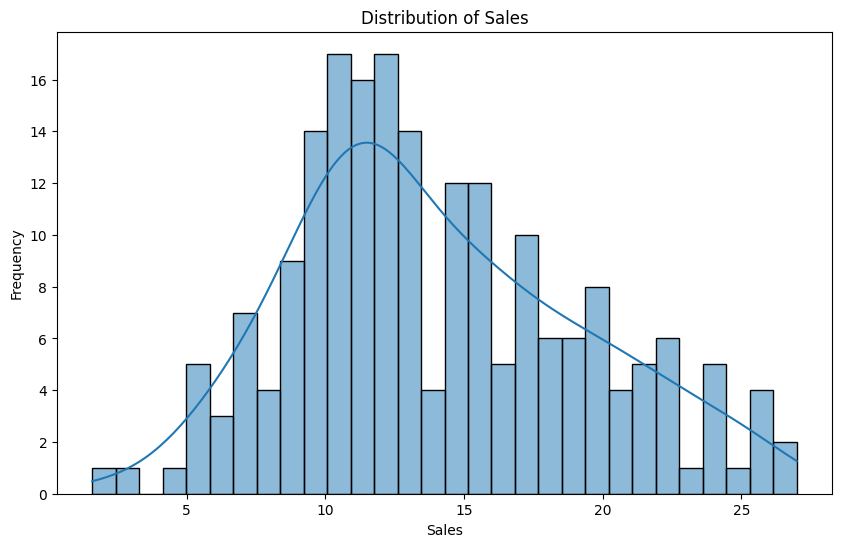

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], bins=30, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

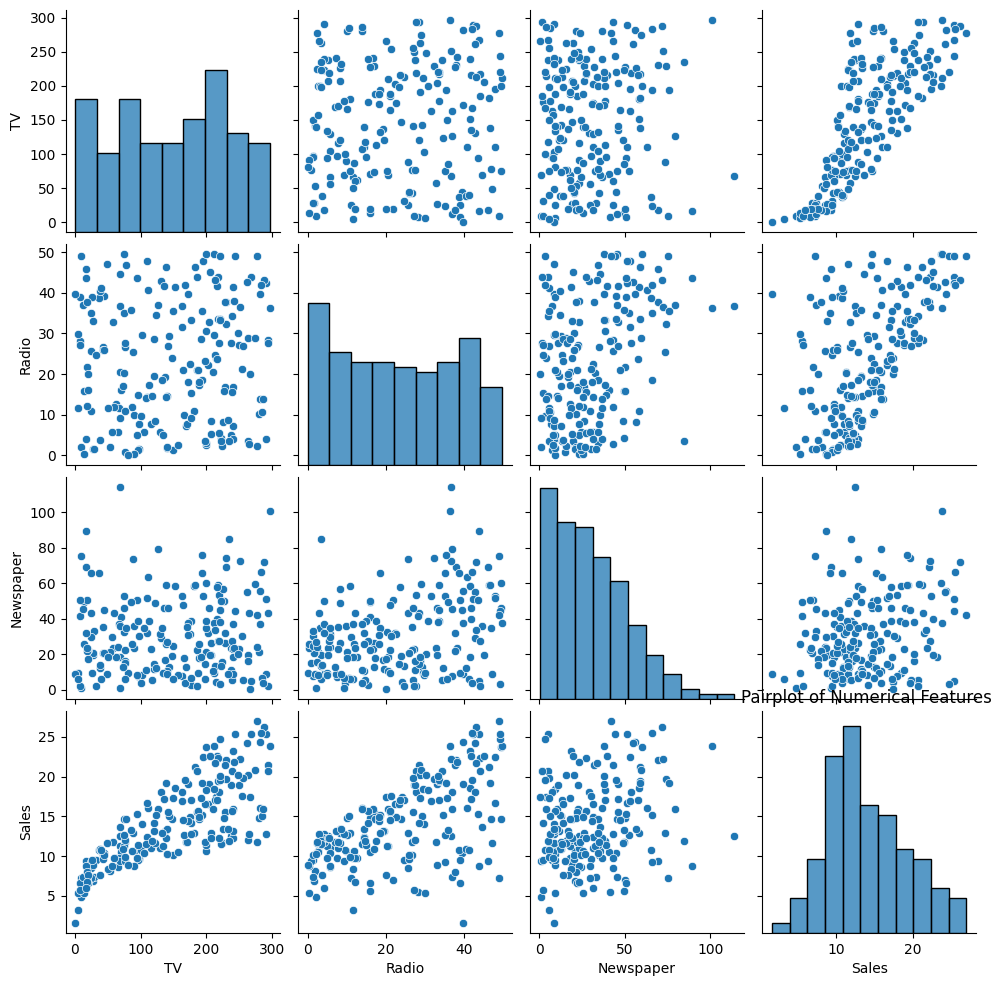

In [ ]:
sns.pairplot(df, vars=['TV', 'Radio', 'Newspaper', 'Sales'])
plt.title('Pairplot of Numerical Features ')
plt.show()

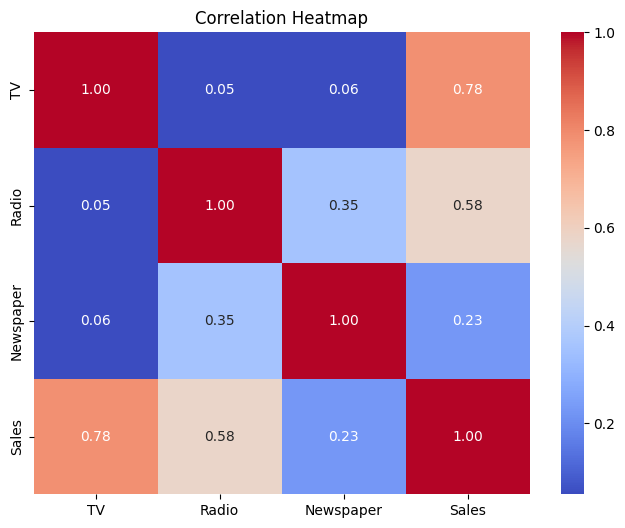

In [ ]:
plt.figure(figsize=(8, 6))
correlation_matrix = df[['TV', 'Radio', 'Newspaper', 'Sales']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

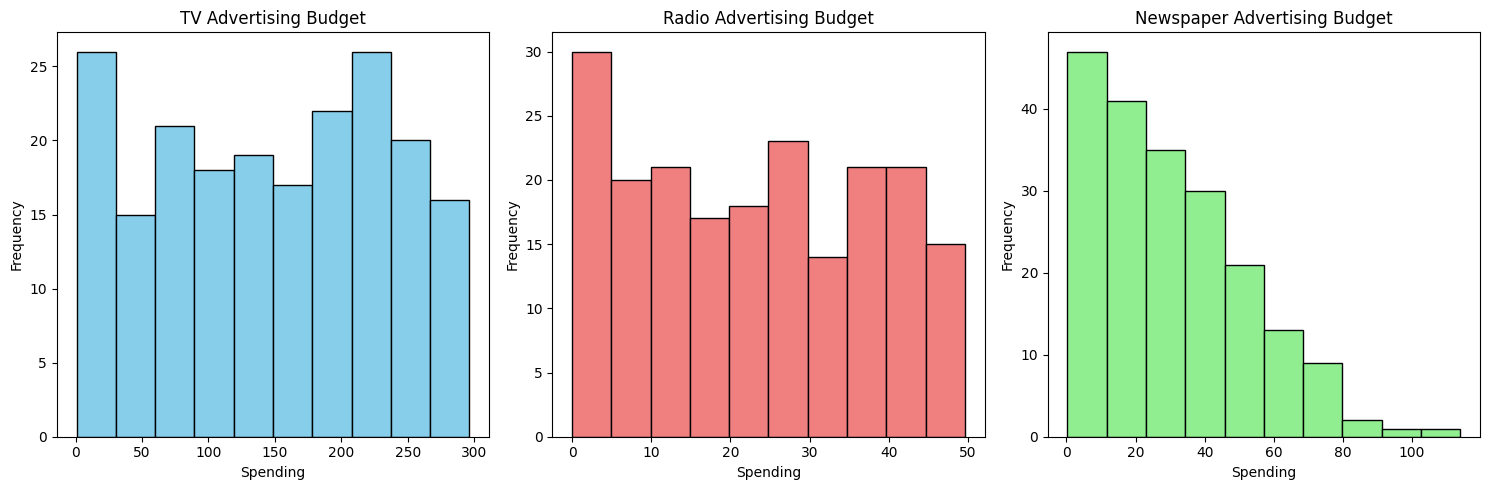

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

df["TV"].plot.hist(ax=axes[0], bins=10, color='skyblue', edgecolor='black')
axes[0].set_title('TV Advertising Budget')
axes[0].set_xlabel('Spending')
axes[0].set_ylabel('Frequency')

df["Radio"].plot.hist(ax=axes[1], bins=10, color='lightcoral', edgecolor='black')
axes[1].set_title('Radio Advertising Budget')
axes[1].set_xlabel('Spending')
axes[1].set_ylabel('Frequency')

df["Newspaper"].plot.hist(ax=axes[2], bins=10, color='lightgreen', edgecolor='black')
axes[2].set_title('Newspaper Advertising Budget')
axes[2].set_xlabel('Spending')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df[["TV","Radio","Newspaper"]], df[["Sales"]], test_size=0.3, random_state=42)

In [ ]:
names = []
acc = []
mse1 = []

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
names.append("LinearRegression")
acc.append(r2)
mse1.append(mse)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 3.80
R-squared (R2): 0.86


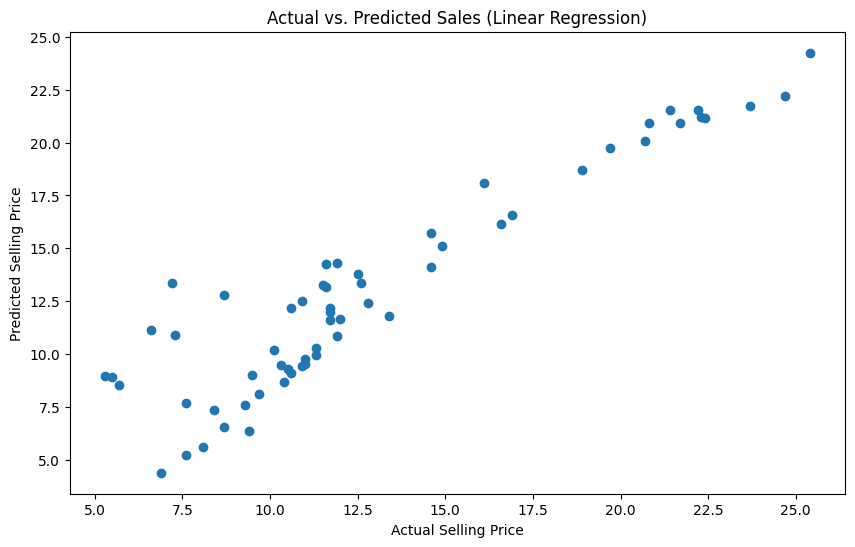

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred)
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs. Predicted Sales (Linear Regression)')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=17)

rf_model.fit(X_train, Y_train)

rf_Y_pred = rf_model.predict(X_test)

rf_mse = mean_squared_error(Y_test, rf_Y_pred)
rf_r2 = r2_score(Y_test, rf_Y_pred)
names.append("RandomForest")
acc.append(rf_r2)
mse1.append(rf_mse)
print(f"Random Forest Mean Squared Error (MSE): {rf_mse:.2f}")
print(f"Random Forest R-squared (R2): {rf_r2:.2f}")

<ipython-input-119-80e501cb3253>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, Y_train)


Random Forest Mean Squared Error (MSE): 0.47
Random Forest R-squared (R2): 0.98


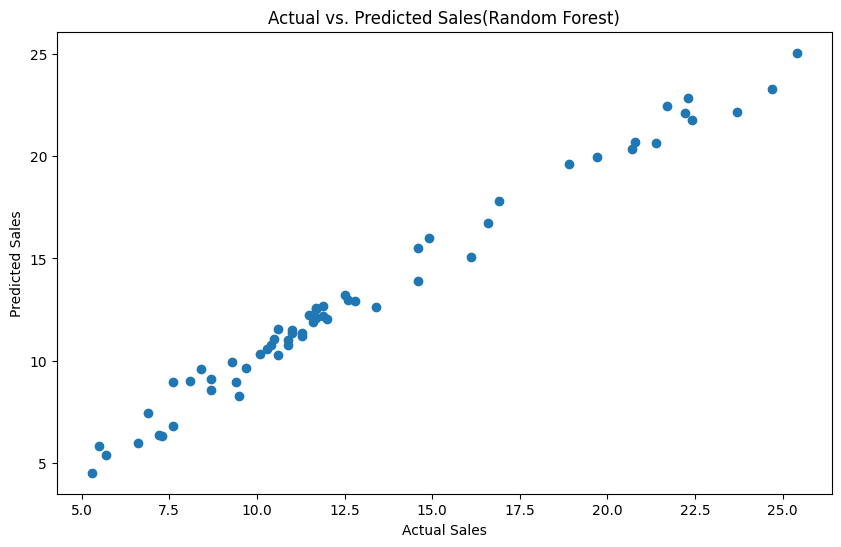

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, rf_Y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales(Random Forest)')
plt.show()

In [ ]:
from lightgbm import LGBMRegressor
rf_model = LGBMRegressor(random_state=17)

rf_model.fit(X_train, Y_train)

rf_Y_pred = rf_model.predict(X_test)

rf_mse = mean_squared_error(Y_test, rf_Y_pred)
rf_r2 = r2_score(Y_test, rf_Y_pred)
names.append("LGBMRegressor")
acc.append(rf_r2)
mse1.append(rf_mse)
print(f"Random Forest Mean Squared Error (MSE): {rf_mse:.2f}")
print(f"Random Forest R-squared (R2): {rf_r2:.2f}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000045 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 139
[LightGBM] [Info] Number of data points in the train set: 140, number of used features: 3
[LightGBM] [Info] Start training from score 14.497143
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

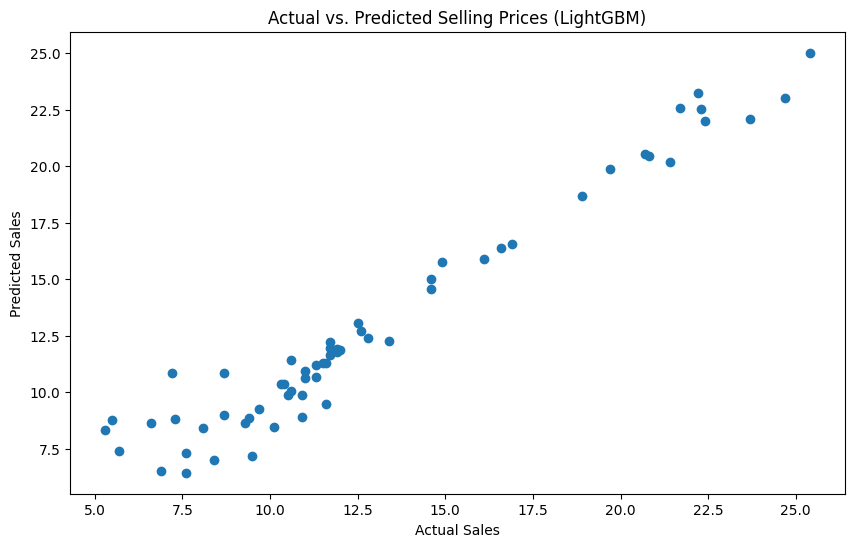

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, rf_Y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Selling Prices (LightGBM)')
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
rf_model = GradientBoostingRegressor(random_state=17)

rf_model.fit(X_train, Y_train)

rf_Y_pred = rf_model.predict(X_test)

rf_mse = mean_squared_error(Y_test, rf_Y_pred)
rf_r2 = r2_score(Y_test, rf_Y_pred)
names.append("GradientBoosting")
acc.append(rf_r2)
mse1.append(rf_mse)
print(f"Random Forest Mean Squared Error (MSE): {rf_mse:.2f}")
print(f"Random Forest R-squared (R2): {rf_r2:.2f}")

Random Forest Mean Squared Error (MSE): 0.54
Random Forest R-squared (R2): 0.98


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


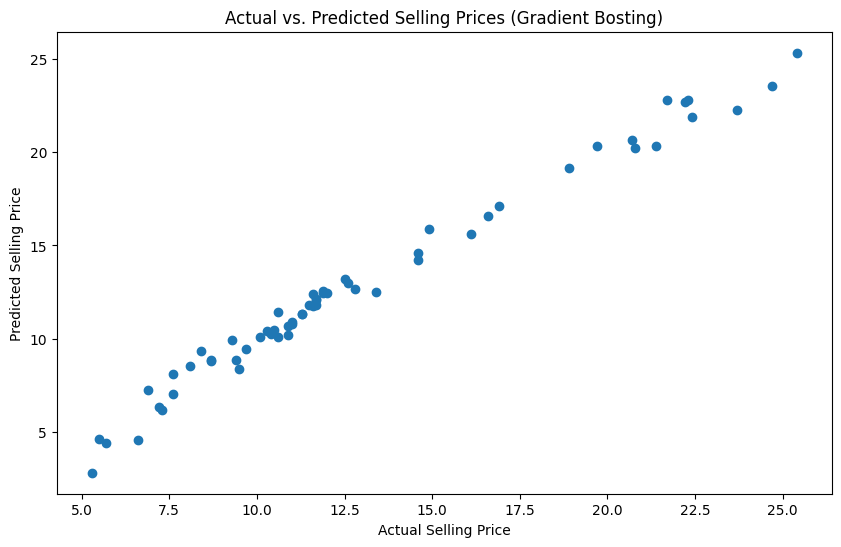

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, rf_Y_pred)
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs. Predicted Selling Prices (Gradient Bosting)')
plt.show()

In [ ]:
from xgboost.sklearn import XGBRegressor
rf_model = XGBRegressor(random_state=17)

rf_model.fit(X_train, Y_train)

rf_Y_pred = rf_model.predict(X_test)

rf_mse = mean_squared_error(Y_test, rf_Y_pred)
rf_r2 = r2_score(Y_test, rf_Y_pred)
names.append("XgBoost")
acc.append(rf_r2)
mse1.append(rf_mse)
print(f"Random Forest Mean Squared Error (MSE): {rf_mse:.2f}")
print(f"Random Forest R-squared (R2): {rf_r2:.2f}")

Random Forest Mean Squared Error (MSE): 0.88
Random Forest R-squared (R2): 0.97


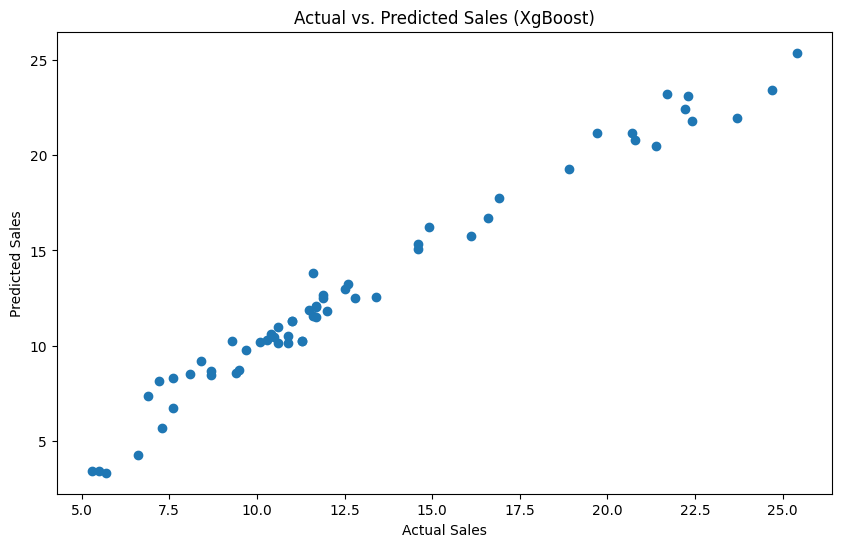

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, rf_Y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales (XgBoost)')
plt.show()

In [ ]:
acc

[0.8609466508230368,
 0.9828747717494574,
 0.9486564090589623,
 0.9803405720176016,
 0.9677058440579542]

In [ ]:
for i in range(5):
  print("Classifier = ",names[i])
  print("R2_Score = ",acc[i])
  print("Mean_Square_Error = ",mse1[i])
  print("-----------------------------------------------------------------------------------------------------------------------------------")